<h1><center><font size="6">Stock Market Analysis</font></center></h1>


<center><img src="http://www.ein55.com/wp-content/uploads/2020/02/technical-analysis.jpg"></img></center>



  

## Importing Libraries

In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected = True)

## Loading Data

In [143]:
data=pd.read_csv("../input/stock-exchange-data/indexData.csv")
data.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


## Describing Data

In [144]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
mean,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
std,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


## Counting Null Values

In [145]:
data.isnull().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

## Data Information

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


## Handling Null values

In [147]:
data['Open'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)
data['Close'].fillna(method='ffill', inplace=True)
data['Adj Close'].fillna(method='ffill', inplace=True)
data['Volume'].fillna(method='ffill', inplace=True)
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,112457.000000,112457.000000,112457.000000,112457.000000,112457.000000,1.124570e+05
mean,7654.901862,7700.680632,7604.628542,7654.124366,7653.926321,1.253440e+09
std,9001.203386,9056.036716,8944.420679,9001.234087,9001.334734,4.279535e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1860.280029,1869.819946,1849.369995,1860.130005,1859.819946,0.000000e+00
50%,5167.399902,5203.759766,5132.270020,5170.080078,5170.060547,3.964000e+05
75%,10123.610350,10193.730470,10050.519530,10124.660160,10124.660160,1.660552e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


In [148]:
data.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Correlation Matrix

In [149]:
corrs=data.corr(method='pearson')
# The new dataframe indicates the correlation matrix.
corrs

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999959,0.999944,0.999907,0.999907,0.137467
High,0.999959,1.000000,0.999931,0.999956,0.999956,0.137312
Low,0.999944,0.999931,1.000000,0.999960,0.999960,0.137337
Close,0.999907,0.999956,0.999960,1.000000,1.000000,0.137346
Adj Close,0.999907,0.999956,0.999960,1.000000,1.000000,0.137350
Volume,0.137467,0.137312,0.137337,0.137346,0.137350,1.000000


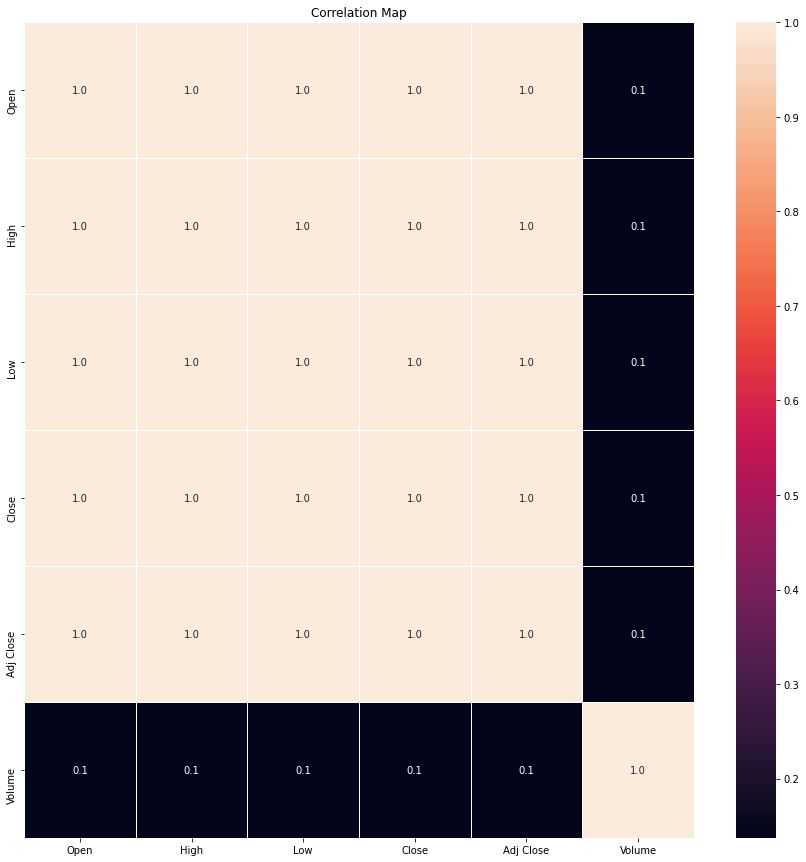

In [150]:
# Creating a correlation map to show the values of the correlated and uncorrelated columns:
# Controls the figure size.
f,ax = plt.subplots(figsize=(15, 15)) 
# Annot shows the value of the correlated index.
sns.heatmap(corrs, annot=True, linewidths=.5, fmt= '.1f',ax=ax) 
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title("Correlation Map")
plt.show()

## Data

In [151]:
data.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


## Reading Another Data File

In [152]:
df_info = pd.read_csv("/kaggle/input/stock-exchange-data/indexInfo.csv")
df_info

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY
5,Europe,Euronext,N100,EUR
6,China,Shenzhen Stock Exchange,399001.SZ,CNY
7,Canada,Toronto Stock Exchange,GSPTSE,CAD
8,India,National Stock Exchange of India,NSEI,INR
9,Germany,Frankfurt Stock Exchange,GDAXI,EUR


## Merging Data

In [153]:
df_merge = data.merge(df_info, on = "Index", how = "inner" )
df_merge

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Region,Exchange,Currency
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,New York Stock Exchange,USD
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,New York Stock Exchange,USD
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,New York Stock Exchange,USD
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,New York Stock Exchange,USD
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,New York Stock Exchange,USD
...,...,...,...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0,Europe,Euronext,EUR
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0,Europe,Euronext,EUR
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0,Europe,Euronext,EUR
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0,Europe,Euronext,EUR


In [154]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112457 entries, 0 to 112456
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       112457 non-null  float64
 3   High       112457 non-null  float64
 4   Low        112457 non-null  float64
 5   Close      112457 non-null  float64
 6   Adj Close  112457 non-null  float64
 7   Volume     112457 non-null  float64
 8   Region     112457 non-null  object 
 9   Exchange   112457 non-null  object 
 10  Currency   112457 non-null  object 
dtypes: float64(6), object(5)
memory usage: 10.3+ MB


In [155]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'])  


In [156]:
df_merge.Index.value_counts()

N225         14500
NYA          13948
IXIC         12690
GSPTSE       10776
HSI           8750
GDAXI         8606
SSMI          7830
KS11          6181
TWII          6010
000001.SS     5963
399001.SZ     5928
N100          5507
NSEI          3381
J203.JO       2387
Name: Index, dtype: int64

In [157]:
df_se.Index.value_counts()

SSMI    7830
N100    5507
Name: Index, dtype: int64

# Selecting Region

In [158]:
options = ["Europe", "Switzerland"]
df_se = df_merge[df_merge["Region"].isin(options)]
df_se.head(10)

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Region,Exchange,Currency
76223,SSMI,1990-11-09,1378.900024,1389.000000,1375.300049,1387.099976,1387.099976,0.0,Switzerland,SIX Swiss Exchange,CHF
76224,SSMI,1990-11-12,1388.099976,1408.099976,1388.099976,1407.500000,1407.500000,0.0,Switzerland,SIX Swiss Exchange,CHF
76225,SSMI,1990-11-13,1412.199951,1429.400024,1411.400024,1415.199951,1415.199951,0.0,Switzerland,SIX Swiss Exchange,CHF
76226,SSMI,1990-11-14,1413.599976,1413.599976,1402.099976,1410.300049,1410.300049,0.0,Switzerland,SIX Swiss Exchange,CHF
76227,SSMI,1990-11-15,1410.599976,1416.699951,1405.099976,1405.699951,1405.699951,0.0,Switzerland,SIX Swiss Exchange,CHF
76228,SSMI,1990-11-16,1405.699951,1407.400024,1389.400024,1395.199951,1395.199951,0.0,Switzerland,SIX Swiss Exchange,CHF
76229,SSMI,1990-11-19,1395.599976,1417.900024,1395.599976,1416.000000,1416.000000,0.0,Switzerland,SIX Swiss Exchange,CHF
76230,SSMI,1990-11-20,1414.800049,1415.000000,1404.699951,1405.800049,1405.800049,0.0,Switzerland,SIX Swiss Exchange,CHF
76231,SSMI,1990-11-21,1405.599976,1405.599976,1396.699951,1398.400024,1398.400024,0.0,Switzerland,SIX Swiss Exchange,CHF
76232,SSMI,1990-11-22,1400.000000,1401.400024,1384.500000,1388.800049,1388.800049,0.0,Switzerland,SIX Swiss Exchange,CHF


### Pairplot

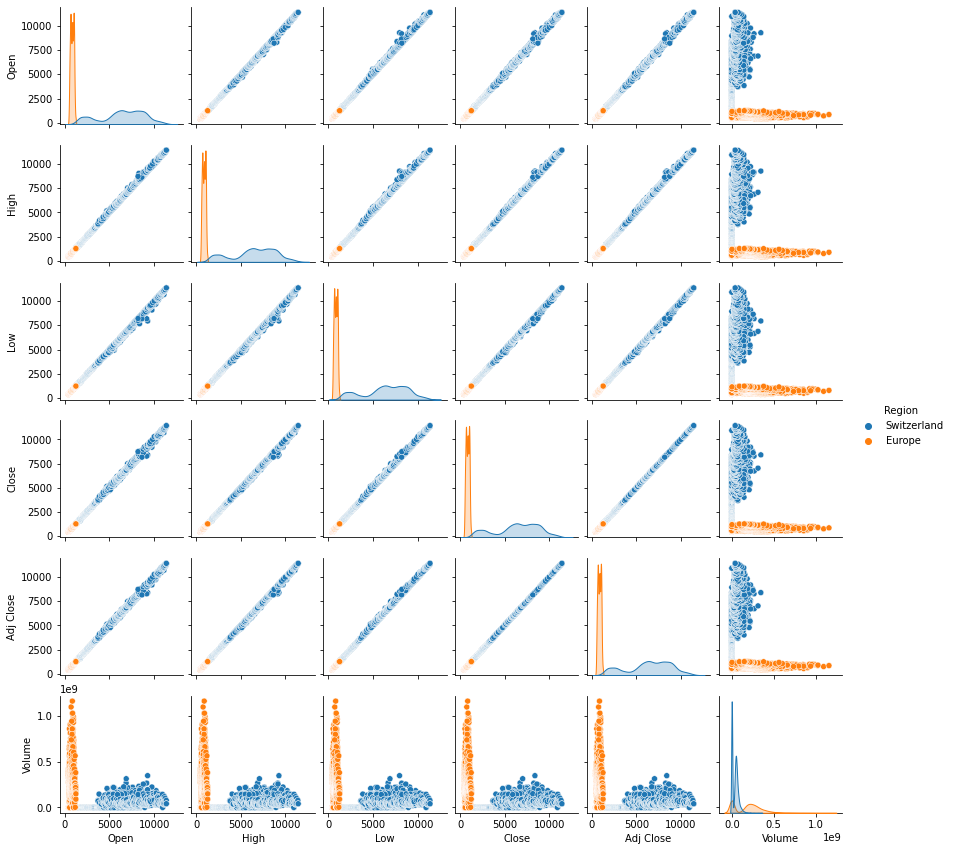

In [159]:
sns.pairplot(df_se, hue='Region', height=2)

## **Box Plots for Quantitative Attributes**

### Box Plot for High Values

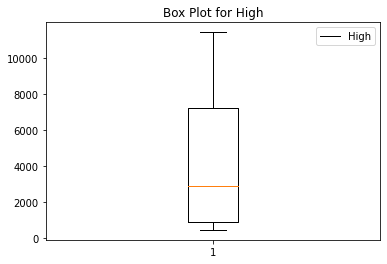

In [160]:
plt.boxplot(df_se["High"])
  
# Title to the plot
plt.title("Box Plot for High")
  
# Adding the legends
plt.legend(["High"])
plt.show()

### Box Plot for Low Values

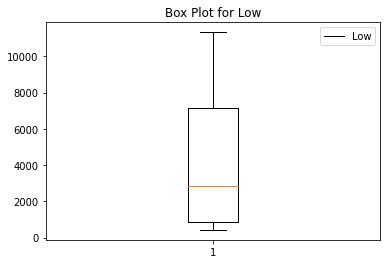

In [161]:
plt.boxplot(df_se["Low"])
  
# Title to the plot
plt.title("Box Plot for Low")
  
# Adding the legends
plt.legend(["Low"])
plt.show()

### Box Plot for Volume

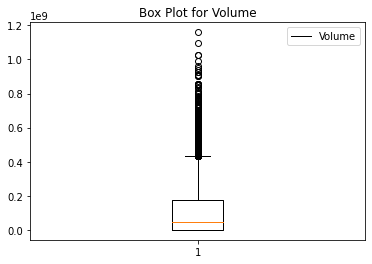

In [162]:
plt.boxplot(df_se["Volume"])
  
# Title to the plot
plt.title("Box Plot for Volume")
  
# Adding the legends
plt.legend(["Volume"])
plt.show()

In [172]:
# We find that Volume has a lot of Outliers

# Open Stock Price

### Box Plot for Open Stock Price

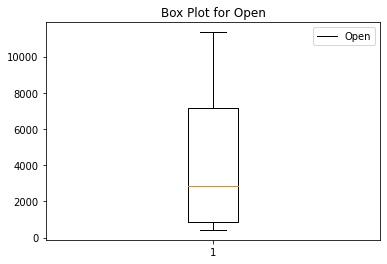

In [163]:
plt.boxplot(df_se["Open"])
  
# Title to the plot
plt.title("Box Plot for Open")
  
# Adding the legends
plt.legend(["Open"])
plt.show()

### Line Chart for Open Stock Price

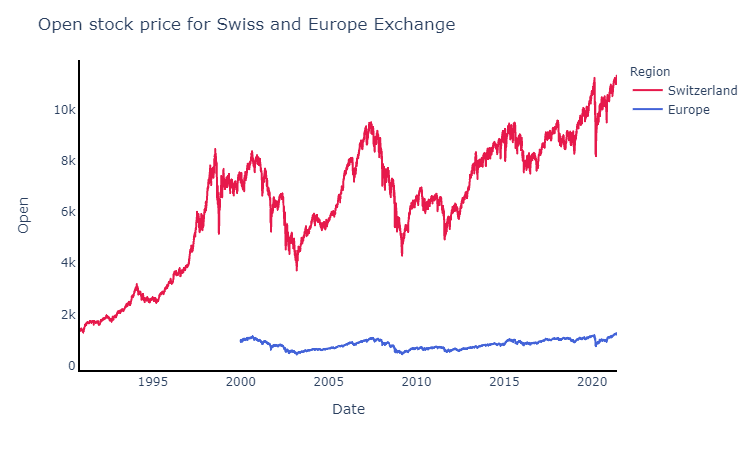

In [164]:
fig = px.line(df_se, x="Date", y="Open", color = "Region", 
             labels = {"Index":"Region"}, color_discrete_map={
                "Europe":"#4363d8",
                "Switzerland":"#e6194B",
             })
# Add figure title
fig.update_layout(
    plot_bgcolor = "white",
    title_text="Open stock price for Swiss and Europe Exchange"
)

fig.update_yaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")
fig.update_xaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")

iplot(fig)

# Close Stock Price

### Box Plot for Close Stock Price

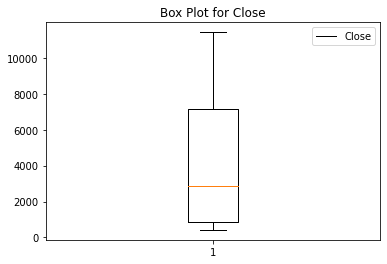

In [165]:
plt.boxplot(df_se["Close"])
  
# Title to the plot
plt.title("Box Plot for Close")
  
# Adding the legends
plt.legend(["Close"])
plt.show()

### Line Chart for Close Stock Price

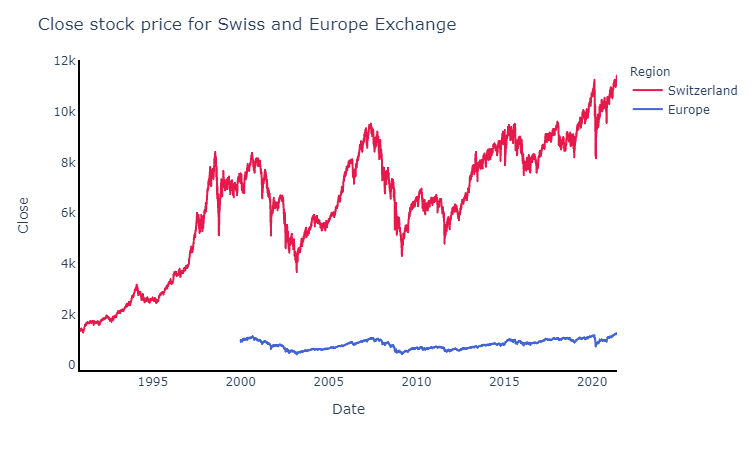

In [166]:
fig = px.line(df_se, x='Date', y="Close", color = "Region", 
             labels = {"Index":"Region"}, color_discrete_map={
                "Europe":"#4363d8",
                "Switzerland":"#e6194B",
             })
# Add figure title
fig.update_layout(
    plot_bgcolor = "white",
    title_text="Close stock price for Swiss and Europe Exchange"
)

fig.update_yaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")
fig.update_xaxes(showticklabels = True, showline = True, linewidth = 2, linecolor = "black")

iplot(fig)

## **Handling Outliers**

In [167]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample=df_se['Volume']
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [432766100.0, 432833400.0, 433375700.0, 433417300.0, 433517600.0, 433551600.0, 433697100.0, 434282400.0, 434542500.0, 434780900.0, 435772700.0, 436453600.0, 436619200.0, 436719900.0, 437422400.0, 438060400.0, 438614500.0, 439220100.0, 439278000.0, 439382100.0, 439643800.0, 440423700.0, 440747000.0, 440759300.0, 441052700.0, 442151300.0, 442241600.0, 442908000.0, 443055300.0, 443325400.0, 443407700.0, 443571200.0, 443658600.0, 443682000.0, 444628100.0, 444839700.0, 445344200.0, 445451700.0, 445495300.0, 445751600.0, 446546200.0, 446965200.0, 448286600.0, 448299100.0, 448491500.0, 448765200.0, 448882100.0, 448989400.0, 449032400.0, 449226600.0, 449334700.0, 449446300.0, 449643000.0, 449948100.0, 450040500.0, 450160200.0, 451240400.0, 451510700.0, 451530900.0, 451607400.0, 452589200.0, 452706200.0, 453759600.0, 453802800.0, 454420000.0, 454929800.0, 455338400.0, 455680700.0, 455935300.0, 456704300.0, 456873200.0, 457454300.0, 457879400.0, 458303500.0, 458729600.

In [168]:
# Trimming
for i in sample:
    a = np.delete(sample_outliers, np.where(sample_outliers==i))
print(a)
print(len(sample), len(a))

[4.3276610e+08 4.3283340e+08 4.3337570e+08 4.3341730e+08 4.3351760e+08
 4.3355160e+08 4.3369710e+08 4.3428240e+08 4.3454250e+08 4.3478090e+08
 4.3577270e+08 4.3645360e+08 4.3661920e+08 4.3671990e+08 4.3742240e+08
 4.3806040e+08 4.3861450e+08 4.3922010e+08 4.3927800e+08 4.3938210e+08
 4.3964380e+08 4.4042370e+08 4.4074700e+08 4.4075930e+08 4.4105270e+08
 4.4215130e+08 4.4224160e+08 4.4290800e+08 4.4305530e+08 4.4332540e+08
 4.4340770e+08 4.4357120e+08 4.4365860e+08 4.4368200e+08 4.4462810e+08
 4.4483970e+08 4.4534420e+08 4.4545170e+08 4.4549530e+08 4.4575160e+08
 4.4654620e+08 4.4696520e+08 4.4828660e+08 4.4829910e+08 4.4849150e+08
 4.4876520e+08 4.4888210e+08 4.4898940e+08 4.4903240e+08 4.4922660e+08
 4.4933470e+08 4.4944630e+08 4.4964300e+08 4.4994810e+08 4.5004050e+08
 4.5016020e+08 4.5124040e+08 4.5151070e+08 4.5153090e+08 4.5160740e+08
 4.5258920e+08 4.5270620e+08 4.5375960e+08 4.5380280e+08 4.5442000e+08
 4.5492980e+08 4.5533840e+08 4.5568070e+08 4.5593530e+08 4.5670430e+08
 4.568

In [169]:
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10)
ninetieth_percentile = np.percentile(sample, 90)
b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
# print("Sample:", sample)
print("New array:",b)

New array: [0.000000e+00 0.000000e+00 0.000000e+00 ... 9.117370e+07 1.551799e+08
 1.484650e+08]


In [170]:
median = np.median(sample)# Replace with median
for i in sample_outliers:
    c = np.where(sample==i, 14, sample)
print("Sample: ", sample)
print("New array: ",c)
# print(x.dtype)

Sample:  76223             0.0
76224             0.0
76225             0.0
76226             0.0
76227             0.0
             ...     
112452    379696400.0
112453    160773400.0
112454     91173700.0
112455    155179900.0
112456    148465000.0
Name: Volume, Length: 13337, dtype: float64
New array:  [0.000000e+00 0.000000e+00 0.000000e+00 ... 9.117370e+07 1.551799e+08
 1.484650e+08]


Text(0.5, 0, 'Sample')

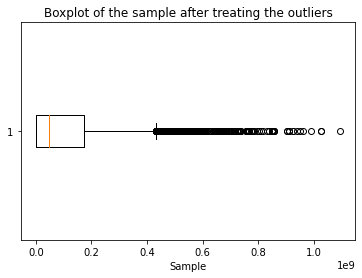

In [171]:
plt.boxplot(c, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")

In [173]:
# There is no difference because volume sizes differ